In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
import seaborn as sns

In [ ]:
df=pd.concat(map(pd.read_csv, ['1.csv', '2.csv',"3.csv","4.csv","5.csv"]))

In [ ]:
df

,pid,lc_topog,topog_source,de_type,de_grade,de_stag,path_stag,clinical_stag,stage_sum,valcsg,clinical_t_7thed,clinical_n_7thed,clinical_m_7thed,path_t_7thed,path_n_7thed,path_m_7thed,de_stag_7thed,first_lc,lesionsize,lc_morph,lc_behav,lc_grade,source_best_stage,clinical_t,path_t,clinical_n,path_n,clinical_m,path_m,stage_only,study_yr,dataset_version,lc_order,candx_days,sct_ab_desc,sct_ab_num,sct_epi_loc,sct_long_dia,sct_margins,sct_perp_dia,...,locrlow,locrmid,locunk,locrup,locoth,locmed,loclmsb,locrmsb,loccar,loclin,scr_res0,scr_res1,scr_res2,scr_iso0,scr_iso1,scr_iso2,cancyr,can_scr,canc_rpt_link,scr_days0,scr_days1,scr_days2,canc_free_days,ctdxqual,techpara_kvp,techpara_ma,techpara_fov,techpara_effmas,ct_recon_filter1,ct_recon_filter2,ctdxqual_breath,ctdxqual_motion,ctdxqual_resp,ctdxqual_techpara,ctdxqual_inadeqimg,ctdxqual_artifact,ctdxqual_graininess,ctdxqual_other,ct_recon_filter3,ct_recon_filter4
0,100012,C34.1,2.0,8140.0,3.0,110.0,110.0,110.0,NaN,NaN,110.0,0.0,0.0,110.0,0.0,0.0,110.0,1.0,20.0,8140.0,3.0,2.0,1.0,100.0,100.0,0.0,0.0,0.0,0.0,NaN,1.0,2011.02.03/05.12.21,1.0,454.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100049,C34.3,1.0,8046.0,4.0,220.0,NaN,220.0,1.0,NaN,300.0,0.0,0.0,NaN,NaN,NaN,220.0,1.0,54.0,8046.0,3.0,3.0,2.0,300.0,NaN,0.0,NaN,0.0,NaN,220.0,6.0,2011.02.03/05.12.21,1.0,2428.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100055,C34.3,NaN,8140.0,1.0,400.0,NaN,400.0,3.0,NaN,210.0,200.0,110.0,NaN,NaN,NaN,400.0,1.0,14.0,8140.0,3.0,9.0,2.0,200.0,NaN,200.0,NaN,100.0,NaN,400.0,0.0,2011.02.03/05.12.21,1.0,148.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100147,C34.1,2.0,8140.0,3.0,110.0,110.0,110.0,1.0,NaN,120.0,0.0,0.0,120.0,0.0,0.0,110.0,1.0,28.0,8140.0,3.0,2.0,1.0,100.0,100.0,0.0,0.0,0.0,0.0,110.0,1.0,2011.02.03/05.12.21,1.0,491.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100158,C34.1,2.0,8140.0,4.0,110.0,110.0,110.0,NaN,NaN,110.0,0.0,0.0,110.0,0.0,0.0,110.0,1.0,17.0,8140.0,3.0,3.0,1.0,100.0,100.0,0.0,0.0,0.0,0.0,NaN,2.0,2011.02.03/05.12.21,1.0,795.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75133,218893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2011.02.03/05.12.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,120.0,NaN,28.0,40.0,10.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75134,218893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2011.02.03/05.12.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,120.0,NaN,35.0,50.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75135,218894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2011.02.03/05.12.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [ ]:
data= df[["sct_long_dia","de_grade","de_type","first_lc","lc_morph","lc_behav","lc_grade","lc_topog","topog_source","lesionsize","valcsg","lc_order","sct_ab_desc","sct_ab_num","sct_epi_loc","sct_found_after_comp","sct_margins","sct_perp_dia","sct_pre_att","sct_slice_num","sct_ab_preexist","pid","sct_ab_code","sct_ab_gwth","sct_ab_invg","sct_ab_num","sct_ab_preexist","visible_days","race","gender","age","cigsmok","scr_days0","scr_days1","scr_days2","scr_res0","scr_res1","scr_res2","can_scr","canc_free_days","canc_rpt_link","candx_days","de_grade","de_type","lesionsize","loccar","loclin","loclhil","locllow","loclmsb","loclup","locmed","locoth","locrhil","locrlow","locrmid","locrmsb","locrup","locunk","ctdxqual","techpara_kvp","techpara_ma","techpara_fov","techpara_effmas","ct_recon_filter1","ct_recon_filter2","ctdxqual_breath","ctdxqual_motion","ctdxqual_resp","ctdxqual_techpara","ctdxqual_inadeqimg","ctdxqual_artifact","ctdxqual_graininess","ctdxqual_other","ct_recon_filter3","ct_recon_filter4"]]

In [ ]:
data.isnull().sum().nlargest(10)

ct_recon_filter4    339269
ct_recon_filter3    339132
valcsg              337911
topog_source        337416
loccar              337215
loclin              337215
loclhil             337215
locllow             337215
loclmsb             337215
loclup              337215
dtype: int64

In [ ]:
perc = 54
min_count =  int(((100-perc)/100)*data.shape[1] + 1)
df2 = data.dropna( axis=0,thresh=min_count)

In [ ]:
df2

,sct_long_dia,de_grade,de_type,first_lc,lc_morph,lc_behav,lc_grade,lc_topog,topog_source,lesionsize,valcsg,lc_order,sct_ab_desc,sct_ab_num,sct_epi_loc,sct_found_after_comp,sct_margins,sct_perp_dia,sct_pre_att,sct_slice_num,sct_ab_preexist,pid,sct_ab_code,sct_ab_gwth,sct_ab_invg,sct_ab_num,sct_ab_preexist,visible_days,race,gender,age,cigsmok,scr_days0,scr_days1,scr_days2,scr_res0,scr_res1,scr_res2,can_scr,canc_free_days,canc_rpt_link,candx_days,de_grade,de_type,lesionsize,loccar,loclin,loclhil,locllow,loclmsb,loclup,locmed,locoth,locrhil,locrlow,locrmid,locrmsb,locrup,locunk,ctdxqual,techpara_kvp,techpara_ma,techpara_fov,techpara_effmas,ct_recon_filter1,ct_recon_filter2,ctdxqual_breath,ctdxqual_motion,ctdxqual_resp,ctdxqual_techpara,ctdxqual_inadeqimg,ctdxqual_artifact,ctdxqual_graininess,ctdxqual_other,ct_recon_filter3,ct_recon_filter4
48,NaN,4.0,8046.0,NaN,NaN,NaN,NaN,NaN,NaN,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100049,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,74.0,1.0,33.0,491.0,712.0,2.0,2.0,2.0,4.0,2203.0,0.0,2428.0,4.0,8046.0,54.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157,NaN,4.0,8140.0,NaN,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100158,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,65.0,0.0,0.0,363.0,741.0,2.0,2.0,6.0,1.0,728.0,1.0,795.0,4.0,8140.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,NaN,1.0,8140.0,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100196,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,65.0,1.0,77.0,373.0,702.0,1.0,2.0,2.0,4.0,1818.0,0.0,2115.0,1.0,8140.0,59.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
291,NaN,4.0,8070.0,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100292,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,68.0,1.0,35.0,371.0,701.0,1.0,1.0,6.0,1.0,678.0,1.0,734.0,4.0,8070.0,20.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
334,NaN,3.0,8070.0,NaN,NaN,NaN,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100335,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,64.0,1.0,25.0,340.0,725.0,4.0,2.0,6.0,1.0,694.0,1.0,738.0,3.0,8070.0,18.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53263,NaN,4.0,8070.0,NaN,NaN,NaN,NaN,NaN,NaN,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218705,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,68.0,1.0,0.0,369.0,759.0,2.0,3.0,6.0,4.0,1986.0,0.0,1986.0,4.0,8070.0,38.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53307,NaN,9.0,8070.0,NaN,NaN,NaN,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218750,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,55.0,1.0,0.0,391.0,787.0,3.0,3.0,2.0,4.0,1945.0,0.0,1945.0,9.0,8070.0,94.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53356,NaN,9.0,8070.0,NaN,NaN,NaN,NaN,NaN,NaN,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218799,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,65.0,1.0,2.0,471.0,786.0,2.0,2.0,2.0,4.0,2220.0,0.0,2220.0,9.0,8070.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53395,NaN,3.0,8032.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218838,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,56.0,1.0,0.0,396.0,768.0,4.0,2.0,2.0,2.0,1077.0,0.0,1077.0,3.0,8032.

In [ ]:
clustering=df2.drop(columns = ['pid'])

In [ ]:
clustering.isna().sum()

sct_long_dia           917
de_grade                 0
de_type                  0
first_lc               917
lc_morph               917
                      ... 
ctdxqual_artifact      917
ctdxqual_graininess    917
ctdxqual_other         917
ct_recon_filter3       917
ct_recon_filter4       917
Length: 75, dtype: int64

In [ ]:
clustering['first_lc']

48      NaN
157     NaN
195     NaN
291     NaN
334     NaN
         ..
53263   NaN
53307   NaN
53356   NaN
53395   NaN
53443   NaN
Name: first_lc, Length: 917, dtype: float64

In [ ]:
final = clustering.dropna(how='all', axis=1)

In [ ]:
features=final.columns

In [ ]:
features

Index(['de_grade', 'de_type', 'lesionsize', 'race', 'gender', 'age', 'cigsmok',
       'scr_days0', 'scr_days1', 'scr_days2', 'scr_res0', 'scr_res1',
       'scr_res2', 'can_scr', 'canc_free_days', 'canc_rpt_link', 'candx_days',
       'de_grade', 'de_type', 'lesionsize', 'loccar', 'loclin', 'loclhil',
       'locllow', 'loclmsb', 'loclup', 'locmed', 'locoth', 'locrhil',
       'locrlow', 'locrmid', 'locrmsb', 'locrup', 'locunk'],
      dtype='object')

In [ ]:
final.describe()

,de_grade,de_type,lesionsize,race,gender,age,cigsmok,scr_days0,scr_days1,scr_days2,scr_res0,scr_res1,scr_res2,can_scr,canc_free_days,canc_rpt_link,candx_days,de_grade,de_type,lesionsize,loccar,loclin,loclhil,locllow,loclmsb,loclup,locmed,locoth,locrhil,locrlow,locrmid,locrmsb,locrup,locunk
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,4.203926,8115.081788,32.546347,1.179935,1.403490,63.565976,0.587786,13.384951,387.523446,756.635769,2.256270,2.824427,3.332606,3.088332,1426.355507,0.274809,1545.021810,4.203926,8115.081788,32.546347,0.005453,0.008724,0.038168,0.162486,0.014177,0.244275,0.018539,0.009815,0.050164,0.158124,0.052345,0.015267,0.344602,0.004362
std,2.228945,102.110539,23.480069,0.732370,0.490865,5.297200,0.492502,22.683245,46.025230,58.400499,1.176914,1.809344,2.094272,1.348558,513.511267,0.446662,520.264811,2.228945,102.110539,23.480069,0.073680,0.093045,0.191706,0.369098,0.118283,0.429891,0.134963,0.098635,0.218401,0.365057,0.222843,0.122680,0.475498,0.065938
min,1.000000,8000.000000,1.000000,1.000000,1.000000,55.000000,0.000000,0.000000,310.000000,680.000000,1.000000,1.000000,1.000000,1.000000,673.000000,0.000000,720.000000,1.000000,8000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,8046.000000,15.000000,1.000000,1.000000,59.000000,0.000000,0.000000,358.000000,720.000000,1.000000,1.000000,2.000000,1.000000,951.000000,0.000000,1069.000000,3.000000,8046.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,8070.000000,25.000000,1.000000,1.000000,63.000000,1.000000,0.000000,375.000000,737.000000,2.000000,2.000000,2.000000,4.000000,1438.000000,0.000000,1584.000000,4.000000,8070.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,8140.000000,44.000000,1.000000,2.000000,68.000000,1.000000,21.000000,402.000000,772.000000,4.000000,5.000000,6.000000,4.000000,1816.000000,1.000000,1990.000000,5.000000,8140.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.000000,8980.000000,260.000000,7.000000,2.000000,74.000000,1.000000,240.000000,620.000000,1147.000000,4.000000,10.000000,6.000000,4.000000,2618.000000,1.000000,2618.000000,9.000000,8980.000000,260.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 917 entries, 48 to 53443
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   de_grade        917 non-null    float64
 1   de_type         917 non-null    float64
 2   lesionsize      917 non-null    float64
 3   race            917 non-null    float64
 4   gender          917 non-null    float64
 5   age             917 non-null    float64
 6   cigsmok         917 non-null    float64
 7   scr_days0       917 non-null    float64
 8   scr_days1       917 non-null    float64
 9   scr_days2       917 non-null    float64
 10  scr_res0        917 non-null    float64
 11  scr_res1        917 non-null    float64
 12  scr_res2        917 non-null    float64
 13  can_scr         917 non-null    float64
 14  canc_free_days  917 non-null    float64
 15  canc_rpt_link   917 non-null    float64
 16  candx_days      917 non-null    float64
 17  de_grade        917 non-null    

In [ ]:
for column in final:
    unique_vals = np.unique(final[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature de_grade :8 -- [1. 2. 3. 4. 5. 6. 8. 9.]
The number of values for feature de_type :38
The number of values for feature lesionsize :98
The number of values for feature race :7 -- [1. 2. 3. 4. 5. 6. 7.]
The number of values for feature gender :2 -- [1. 2.]
The number of values for feature age :20
The number of values for feature cigsmok :2 -- [0. 1.]
The number of values for feature scr_days0 :86
The number of values for feature scr_days1 :169
The number of values for feature scr_days2 :197
The number of values for feature scr_res0 :4 -- [1. 2. 3. 4.]
The number of values for feature scr_res1 :7 -- [ 1.  2.  3.  4.  5.  6. 10.]
The number of values for feature scr_res2 :5 -- [1. 2. 3. 5. 6.]
The number of values for feature can_scr :3 -- [1. 2. 4.]
The number of values for feature canc_free_days :522
The number of values for feature canc_rpt_link :2 -- [0. 1.]
The number of values for feature candx_days :698
The number of values for feature de_grade :8 --

In [ ]:
final.columns

Index(['de_grade', 'de_type', 'lesionsize', 'race', 'gender', 'age', 'cigsmok',
       'scr_days0', 'scr_days1', 'scr_days2', 'scr_res0', 'scr_res1',
       'scr_res2', 'can_scr', 'canc_free_days', 'canc_rpt_link', 'candx_days',
       'de_grade', 'de_type', 'lesionsize', 'loccar', 'loclin', 'loclhil',
       'locllow', 'loclmsb', 'loclup', 'locmed', 'locoth', 'locrhil',
       'locrlow', 'locrmid', 'locrmsb', 'locrup', 'locunk'],
      dtype='object')

In [ ]:
features = ['de_grade', 'de_type', 'lesionsize', 'race', 'gender', 'age', 'cigsmok',
       'scr_days0', 'scr_days1', 'scr_days2', 'scr_res0', 'scr_res1',
       'scr_res2', 'can_scr', 'canc_free_days', 'canc_rpt_link', 'candx_days',
       'de_grade', 'de_type', 'lesionsize', 'loccar', 'loclin', 'loclhil',
       'locllow', 'loclmsb', 'loclup', 'locmed', 'locoth', 'locrhil',
       'locrlow', 'locrmid', 'locrmsb', 'locrup', 'locunk']
len(features)
len(final)

917

#3 K-Means: Inertia
## Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.



In [ ]:
no_of_clusters = range(1,11) #[2,3,4,5,6,7,8,9]
inertia = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(final)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

The innertia for : 1 Clusters is: 515176248.1941111
The innertia for : 2 Clusters is: 145828409.92096645
The innertia for : 3 Clusters is: 82481092.91870692
The innertia for : 4 Clusters is: 62565013.121185064
The innertia for : 5 Clusters is: 44315880.58558017
The innertia for : 6 Clusters is: 39741685.87427135
The innertia for : 7 Clusters is: 36296628.005674265
The innertia for : 8 Clusters is: 34187151.122308105
The innertia for : 9 Clusters is: 31697386.548986904
The innertia for : 10 Clusters is: 29665002.474344917


Text(0.5, 1.0, 'Inertia Plot per k')

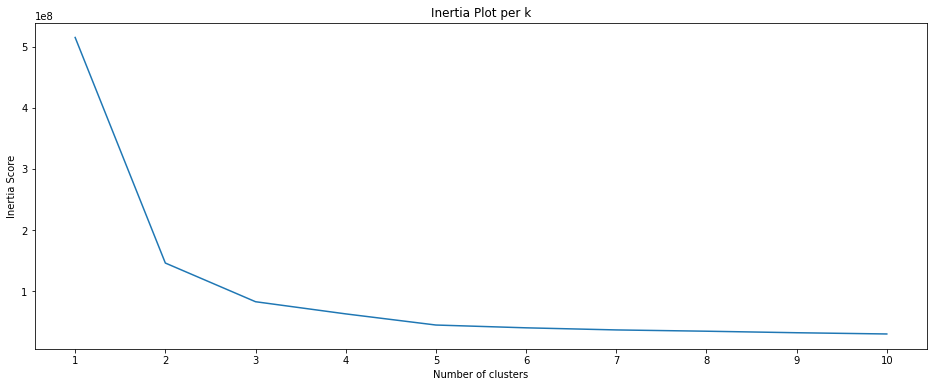

In [ ]:
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(final)


kmeans.labels_

# "predictions" for new data
predictions = kmeans.predict(final)

# calculating the Counts of the cluster
_, x = np.unique(predictions, return_counts=True)
x= x.reshape(1,5)

# Creating a datagrame
countscldf = pd.DataFrame(x, columns= ["Cluster 1","Cluster 2","Cluster 3", "Cluster 4","Cluster 5"])

# display
countscldf


,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5
0,210,237,133,176,161


In [ ]:

kmeans = KMeans(n_clusters=2, random_state=2)
kmeans = kmeans.fit(final)


kmeans.labels_

# "predictions" for new data
predictions = kmeans.predict(final)

# calculating the Counts of the cluster
_, x = np.unique(predictions, return_counts=True)
x= x.reshape(1,2)

# Creating a datagrame
countscldf = pd.DataFrame(x, columns= ["Cluster 1","Cluster 2"])

# display
countscldf


,Cluster 1,Cluster 2
0,407,510


In [ ]:

kmeans = KMeans(n_clusters=3, random_state=2)
kmeans = kmeans.fit(final)


kmeans.labels_

# "predictions" for new data
predictions = kmeans.predict(final)

# calculating the Counts of the cluster
_, x = np.unique(predictions, return_counts=True)
x= x.reshape(1,3)

# Creating a datagrame
countscldf = pd.DataFrame(x, columns= ["Cluster 1","Cluster 2","Cluster 3"])

# display
countscldf


,Cluster 1,Cluster 2,Cluster 3
0,303,341,273


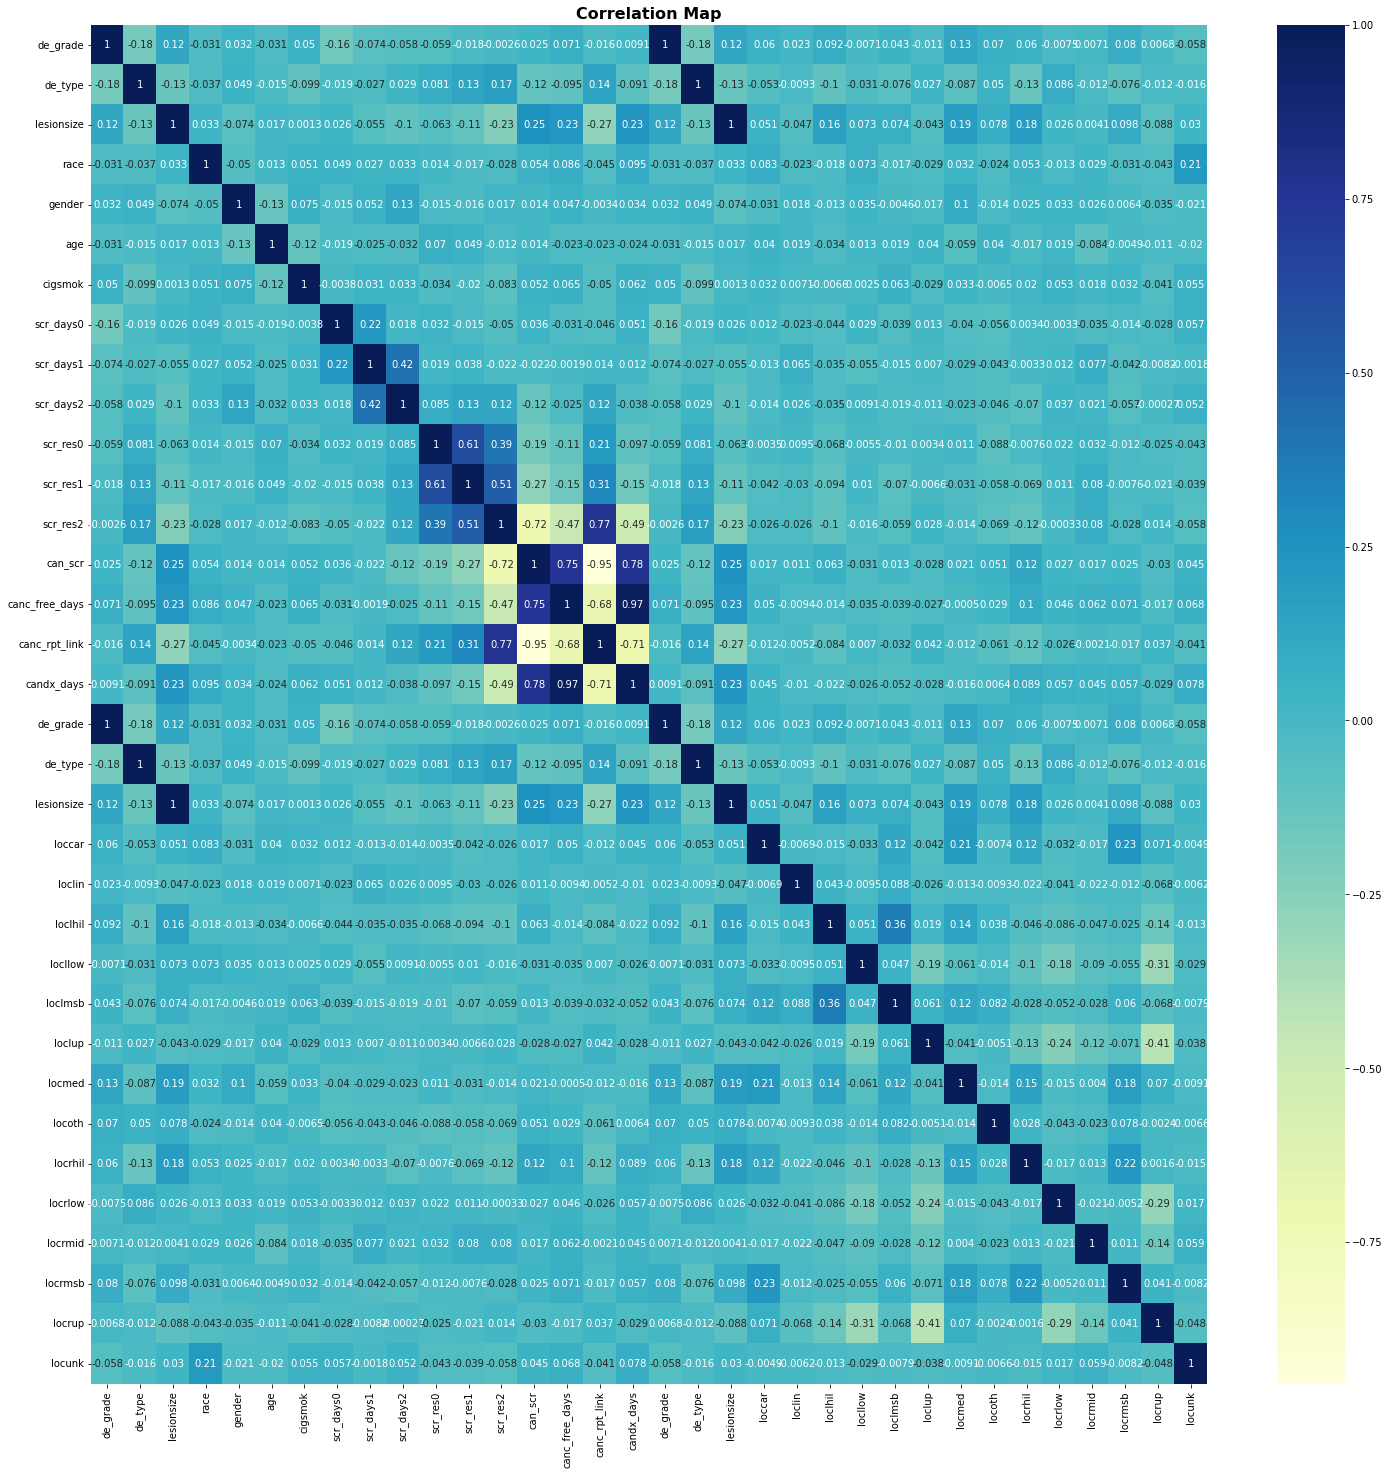

In [ ]:
Cor=final.corr()
plt.figure(figsize=(25,2))
sns.heatmap(final.corr(), cmap='YlGnBu', annot = True)
plt.title("Correlation Map", fontweight = "bold", fontsize=16)
plt.show()

In [ ]:
finall=final.corr().unstack().sort_values().drop_duplicates()

In [ ]:
correlation_df = final.corr()

In [ ]:
print(correlation_df)

                de_grade   de_type  lesionsize      race    gender       age   cigsmok  scr_days0  scr_days1  scr_days2  scr_res0  scr_res1  scr_res2   can_scr  canc_free_days  canc_rpt_link  candx_days  de_grade   de_type  lesionsize    loccar    loclin   loclhil   locllow   loclmsb    loclup    locmed    locoth   locrhil   locrlow   locrmid   locrmsb    locrup    locunk
de_grade        1.000000 -0.179256    0.115517 -0.031196  0.032476 -0.031329  0.049808  -0.163044  -0.073650  -0.058161 -0.059479 -0.017641 -0.002619  0.025235        0.070894      -0.015779    0.009116  1.000000 -0.179256    0.115517  0.059697  0.022996  0.091624 -0.007146  0.042853 -0.011028  0.132581  0.070336  0.059696 -0.007472  0.007059  0.080426  0.006757 -0.058055
de_type        -0.179256  1.000000   -0.134581 -0.036999  0.048565 -0.015160 -0.099404  -0.018546  -0.026626   0.028947  0.081384  0.134950  0.168677 -0.116039       -0.095067       0.140563   -0.091207 -0.179256  1.000000   -0.134581 -0.053023 -0.00

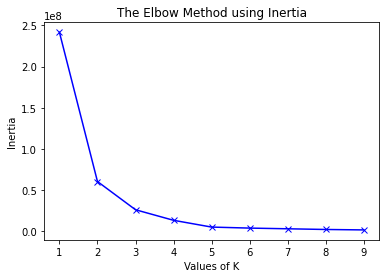

In [ ]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

In [ ]:
k = 2
centroids = final[['canc_free_days','can_scr']].sample(2).values
centroids
colors = {1: 'r', 2:'g', 3: 'black' }

In [ ]:
it  = 0
for it in range(500): # you can put it in while(True) but it will consume much time because it will compare many fraction parts.
    final['1'] = np.sqrt((final['canc_free_days'] - centroids[0][0]) ** 2  + (final['can_scr'] - centroids[0][1]) ** 2)

    final['2'] = np.sqrt((final['canc_free_days'] - centroids[1][0]) ** 2 + (final['can_scr'] - centroids[1][1]) ** 2)


    final['closest'] = final.loc[:, ['1', '2']].idxmin(axis=1).apply(int)
    final['color'] = final['closest'].map(lambda x: colors[x])
    old  = centroids.copy
    for i in range(len(centroids)):
        centroids[i][0] = np.mean(final[final['closest'] == i+1]['canc_free_days']) # compute the mean of all points that belongs to each centroid. i+1 because centroids labels counts from 1 not 0.
        centroids[i][1] = np.mean(final[final['closest'] == i+1]['can_scr'])

    if np.all(old == centroids):
        break

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing import

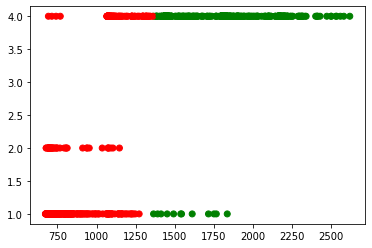

In [ ]:
plt.scatter(final['canc_free_days'], final['can_scr'], c = final['color'])

### 3-

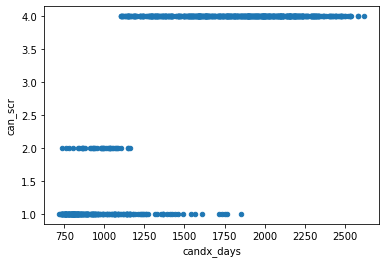

In [ ]:
final.plot.scatter('candx_days', 'can_scr');

In [ ]:
da=final[['candx_days','can_scr']]

In [ ]:
inertias = []
mapping2 = {}
K = range(1, 10)
 
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(da)
    kmeanModel.fit(da)
    inertias.append(kmeanModel.inertia_)
    mapping2[k] = kmeanModel.inertia_ 
    
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 247940399.40894234
2 : 58145856.44844743
3 : 26341874.425001126
4 : 15249533.340961982
5 : 9250233.755150873
6 : 6655872.144100575
7 : 4698779.26513968
8 : 3553848.219610173
9 : 2831410.5290142912


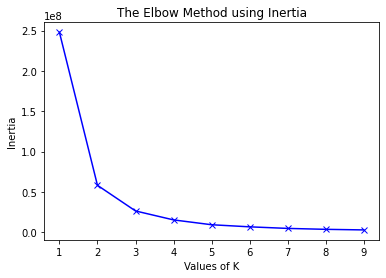

In [ ]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

In [ ]:
it  = 0
for it in range(500): # you can put it in while(True) but it will consume much time because it will compare many fraction parts.
    final['1'] = np.sqrt((final['candx_days'] - centroids[0][0]) ** 2  + (final['can_scr'] - centroids[0][1]) ** 2)

    final['2'] = np.sqrt((final['candx_days'] - centroids[1][0]) ** 2 + (final['can_scr'] - centroids[1][1]) ** 2)


    final['closest'] = final.loc[:, ['1', '2']].idxmin(axis=1).apply(int)
    final['color'] = final['closest'].map(lambda x: colors[x])
    old  = centroids.copy
    for i in range(len(centroids)):
        centroids[i][0] = np.mean(final[final['closest'] == i+1]['candx_days']) # compute the mean of all points that belongs to each centroid. i+1 because centroids labels counts from 1 not 0.
        centroids[i][1] = np.mean(final[final['closest'] == i+1]['can_scr'])

    if np.all(old == centroids):
        break

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing import

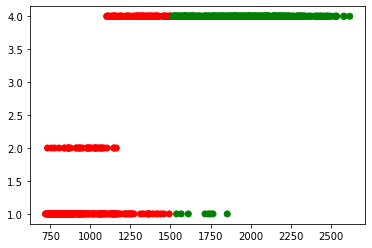

In [ ]:
plt.scatter(final['candx_days'], final['can_scr'], c = final['color'])

### 4- 

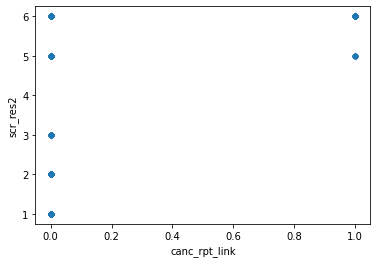

In [ ]:
final.plot.scatter('canc_rpt_link', 'scr_res2');

In [ ]:
ds=final[['canc_rpt_link', 'scr_res2']]

In [ ]:
inertias = []
mapping2 = {}
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(ds)
    kmeanModel.fit(ds)
    inertias.append(kmeanModel.inertia_)
    mapping2[k] = kmeanModel.inertia_ 
    
for key, val in mapping2.items():
    print(f'{key} : {val}')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  


1 : 4200.303162486387
2 : 299.7689132877849
3 : 150.19146005509637
4 : 65.10305760305761
5 : 38.99494949494958
6 : 13.222222222222232
7 : 1.886105719071592e-26
8 : 1.886105719071592e-26
9 : 1.8887459379137537e-26


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  import sys


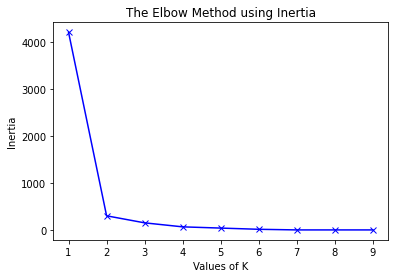

In [ ]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

In [ ]:
it  = 0
for it in range(500): # you can put it in while(True) but it will consume much time because it will compare many fraction parts.
    final['1'] = np.sqrt((final['canc_rpt_link'] - centroids[0][0]) ** 2  + (final['scr_res2'] - centroids[0][1]) ** 2)

    final['2'] = np.sqrt((final['canc_rpt_link'] - centroids[1][0]) ** 2 + (final['scr_res2'] - centroids[1][1]) ** 2)


    final['closest'] = final.loc[:, ['1', '2']].idxmin(axis=1).apply(int)
    final['color'] = final['closest'].map(lambda x: colors[x])
    old  = centroids.copy
    for i in range(len(centroids)):
        centroids[i][0] = np.mean(final[final['closest'] == i+1]['canc_rpt_link']) # compute the mean of all points that belongs to each centroid. i+1 because centroids labels counts from 1 not 0.
        centroids[i][1] = np.mean(final[final['closest'] == i+1]['scr_res2'])

    if np.all(old == centroids):
        break

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing import

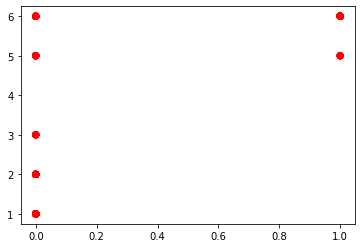

In [ ]:
plt.scatter(final['canc_rpt_link'], final['scr_res2'], c = final['color'])

AgglomerativeClustering

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(final)
X_normalized = normalize(X_scaled)
X_normalized = pd.DataFrame(X_normalized)

In [ ]:
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

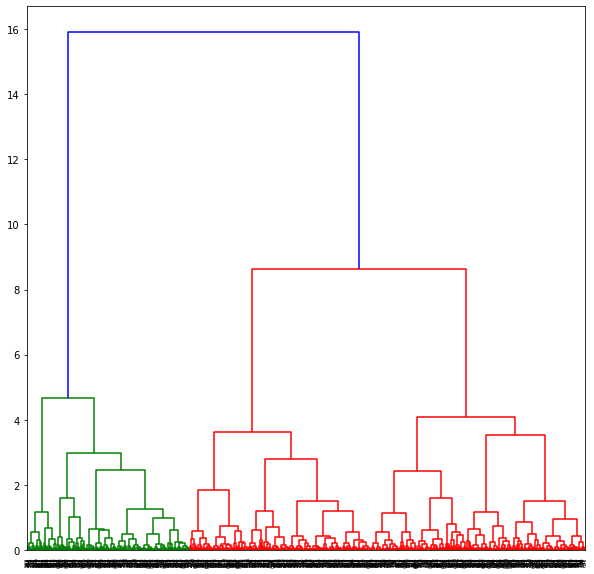

In [ ]:
plt.figure(figsize =(10, 10))
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))

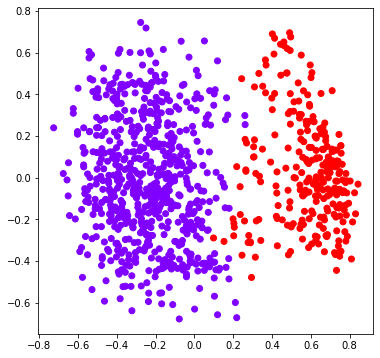

In [ ]:
c2 = AgglomerativeClustering(n_clusters = 2)
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], c = c2.fit_predict(X_principal), cmap ='rainbow')
plt.show()

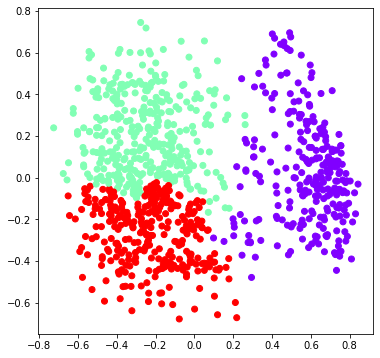

In [ ]:
c3 = AgglomerativeClustering(n_clusters = 3)
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = c3.fit_predict(X_principal), cmap ='rainbow')
plt.show()

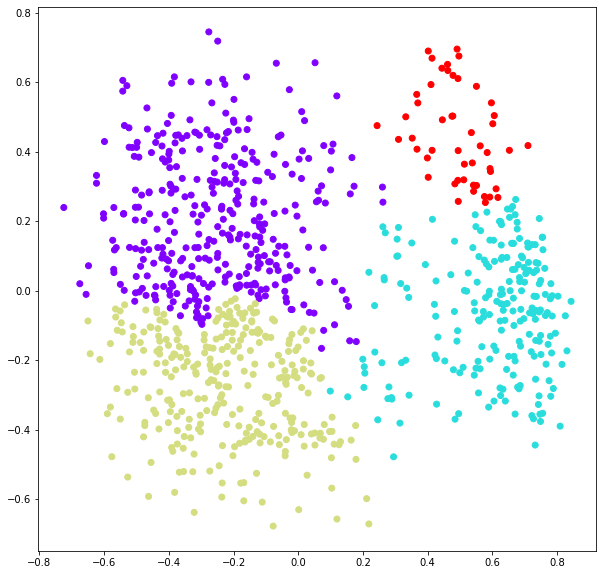

In [ ]:
c4 = AgglomerativeClustering(n_clusters = 4)
plt.figure(figsize =(10, 10))
plt.scatter(X_principal['P1'], X_principal['P2'],
            c = c4.fit_predict(X_principal), cmap ='rainbow')
plt.show()